# How much water is required to have ULVZs at the CMB

In [1]:
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Density at the CMB from PREM

In [3]:
rho_cmb = 5.57e3 # kg/m^3
rho_melt = rho_cmb * 1.44

## Mass of a thin CMB layer

For the upper bound, we assume a global layer of ULVZs at the bottom 20 km of the lower mantle.
We take 20 km for the thickness considering a range of 10-50 km thick ULVZs in the literature.

In [4]:
thickness_ulvz_layer = 20.e3 # m

The ULVZs are assumed to contain hydrous melt.
From seismology models, we take 10% higher density of ULVZs than the surrounding mantle at the CMB.
For hydrous melt, our experiments show 44% higher density than PREM at the CMB.
From these, we can calculate the mass fraction of hydrous melt (`f_melt`, or $f_{melt}$) needed to explain the density of ULVZ.

In [5]:
f_m_melt = 0.2975207 #0.22728
rho_ulvz = 1./( (1-f_m_melt)/rho_cmb + f_m_melt/(rho_melt))
rho_cmb * 1.1, rho_ulvz

(6127.000000000001, 6127.000079991389)

converting mass fraction to volume fraction of melt

In [6]:
rho_ulvz/rho_melt * f_m_melt

0.22727275991161658

## Volume of a thin global layer

We first calculate the upper bound case of a global ULVZ layer and then apply volume fraction of ULVZs, `f_v_ulvz` or $f_{V,ULVZ}$.

In [7]:
r_cmb = 3480.e3 # m
v_ulvz_layer = 4./3. * np.pi * ( (r_cmb + thickness_ulvz_layer)**3. - r_cmb**3.)

f_v_ulvz = np.logspace(-3, 0, num=31)
v_ulvz = v_ulvz_layer * f_v_ulvz
f_v_ulvz, v_ulvz

(array([0.001     , 0.00125893, 0.00158489, 0.00199526, 0.00251189,
        0.00316228, 0.00398107, 0.00501187, 0.00630957, 0.00794328,
        0.01      , 0.01258925, 0.01584893, 0.01995262, 0.02511886,
        0.03162278, 0.03981072, 0.05011872, 0.06309573, 0.07943282,
        0.1       , 0.12589254, 0.15848932, 0.19952623, 0.25118864,
        0.31622777, 0.39810717, 0.50118723, 0.63095734, 0.79432823,
        1.        ]),
 array([3.06120139e+15, 3.85382422e+15, 4.85167725e+15, 6.10789978e+15,
        7.68939024e+15, 9.68036878e+15, 1.21868622e+16, 1.53423506e+16,
        1.93148750e+16, 2.43159870e+16, 3.06120139e+16, 3.85382422e+16,
        4.85167725e+16, 6.10789978e+16, 7.68939024e+16, 9.68036878e+16,
        1.21868622e+17, 1.53423506e+17, 1.93148750e+17, 2.43159870e+17,
        3.06120139e+17, 3.85382422e+17, 4.85167725e+17, 6.10789978e+17,
        7.68939024e+17, 9.68036878e+17, 1.21868622e+18, 1.53423506e+18,
        1.93148750e+18, 2.43159870e+18, 3.06120139e+18]))

## Mass of ULVZs

In [8]:
mass_ulvz = rho_ulvz * v_ulvz
mass_ulvz

array([1.87559812e+19, 2.36123813e+19, 2.97262269e+19, 3.74231024e+19,
       4.71128946e+19, 5.93116203e+19, 7.46689060e+19, 9.40025832e+19,
       1.18342241e+20, 1.48984054e+20, 1.87559812e+20, 2.36123813e+20,
       2.97262269e+20, 3.74231024e+20, 4.71128946e+20, 5.93116203e+20,
       7.46689060e+20, 9.40025832e+20, 1.18342241e+21, 1.48984054e+21,
       1.87559812e+21, 2.36123813e+21, 2.97262269e+21, 3.74231024e+21,
       4.71128946e+21, 5.93116203e+21, 7.46689060e+21, 9.40025832e+21,
       1.18342241e+22, 1.48984054e+22, 1.87559812e+22])

## Mass of water in ULVZs 

Mass of H2O stored in ULVZ melt can be calculated from the following equation.

$$ m(\mathrm{H_2O})_{melt} = \rho_{ULVZ} (f_{V,ULVZ} V_{20km}) f_{m,melt} f(\mathrm{H_2O})_{m,melt} $$

$m(\mathrm{H_2O})_{melt}$ : mass of H2O in ULVZ melt (`mass_water_ulvz`)  
$\rho_{ULVZ}$ : density of ULVZs (`rho_ulvz`)  
$f_{V,ULVZ}$ : volume fraction of ULVZs at the bottom 20-km region of the CMB (`f_v_ulvz`)  
$V_{20km}$ : volume of a global ULVZ layer with 20 km thickness (`v_ulvz_layer`)  
$f(\mathrm{H_2O})_{m,melt}$ : mass fraction of H2O in ULVZ melt (`f_water_melt`)  

If partial melt contains 1 wt% H2O.

In [9]:
f_m_water_melt = 0.01

In [10]:
mass_water_ulvz = mass_ulvz * f_m_melt * f_m_water_melt
mass_water_ulvz

array([5.58029265e+16, 7.02517222e+16, 8.84416783e+16, 1.11341476e+17,
       1.40170614e+17, 1.76464348e+17, 2.22155452e+17, 2.79677144e+17,
       3.52092663e+17, 4.43258401e+17, 5.58029265e+17, 7.02517222e+17,
       8.84416783e+17, 1.11341476e+18, 1.40170614e+18, 1.76464348e+18,
       2.22155452e+18, 2.79677144e+18, 3.52092663e+18, 4.43258401e+18,
       5.58029265e+18, 7.02517222e+18, 8.84416783e+18, 1.11341476e+19,
       1.40170614e+19, 1.76464348e+19, 2.22155452e+19, 2.79677144e+19,
       3.52092663e+19, 4.43258401e+19, 5.58029265e+19])

## Input of water by subduction

Annual input of water by subduction at the surface over a certain geological period can be calculated as:

$$ m(\mathrm{H_2O})_{surface} = \int C(\mathrm{H_2O})_{surface} dt = C(\mathrm{H_2O})_{surface} \Delta t $$

$C(\mathrm{H_2O})_{surface}$ : annual input of water by subduction at the surface (`mass_flux_water_subduction_surface`)  
$\Delta t$ : 2.5 Ga (`time_subduction`)  

In [11]:
time_subduction = 2.5e9 # yr

In [12]:
mass_flux_water_subduction_surface = 1.e12 #kg/yr

In [13]:
mass_water_subduction_surface = (mass_flux_water_subduction_surface * time_subduction)

## Comparison

Ratio between total mass of water to make a global ULVZ layer (upper bound case) and total water input by subduction at the surface for 2.5 Ga.  

In [14]:
f_surface_water_in_ulvz = mass_water_ulvz / mass_water_subduction_surface
print(f_surface_water_in_ulvz.max() * 100., '%')

2.2321170591739903 %


This means:

$$ m(\mathrm{H_2O})_{surface} > m(\mathrm{H_2O})_{melt}. $$

For the extreme upper bound case (global ULVZ), only 2.2% of the subducted water at the surface is needed to create ULVZs by hydrous melting.

## Range of possibilities

To consider the fact that the total volume of ULVZs at the CMB must be smaller than the upper bound case above, we introduce the following equation to calculate H2O ratio between ULVZ and surface input.

$$ \frac{m(\mathrm{H_2O})_{melt}}{m(\mathrm{H_2O})_{surface}} = \frac{\rho_{ULVZ} V_{20km} f_{m,melt} f(\mathrm{H_2O})_{m,melt}}{C(\mathrm{H_2O})_{surface} \Delta t} f_{V,ULVZ} $$

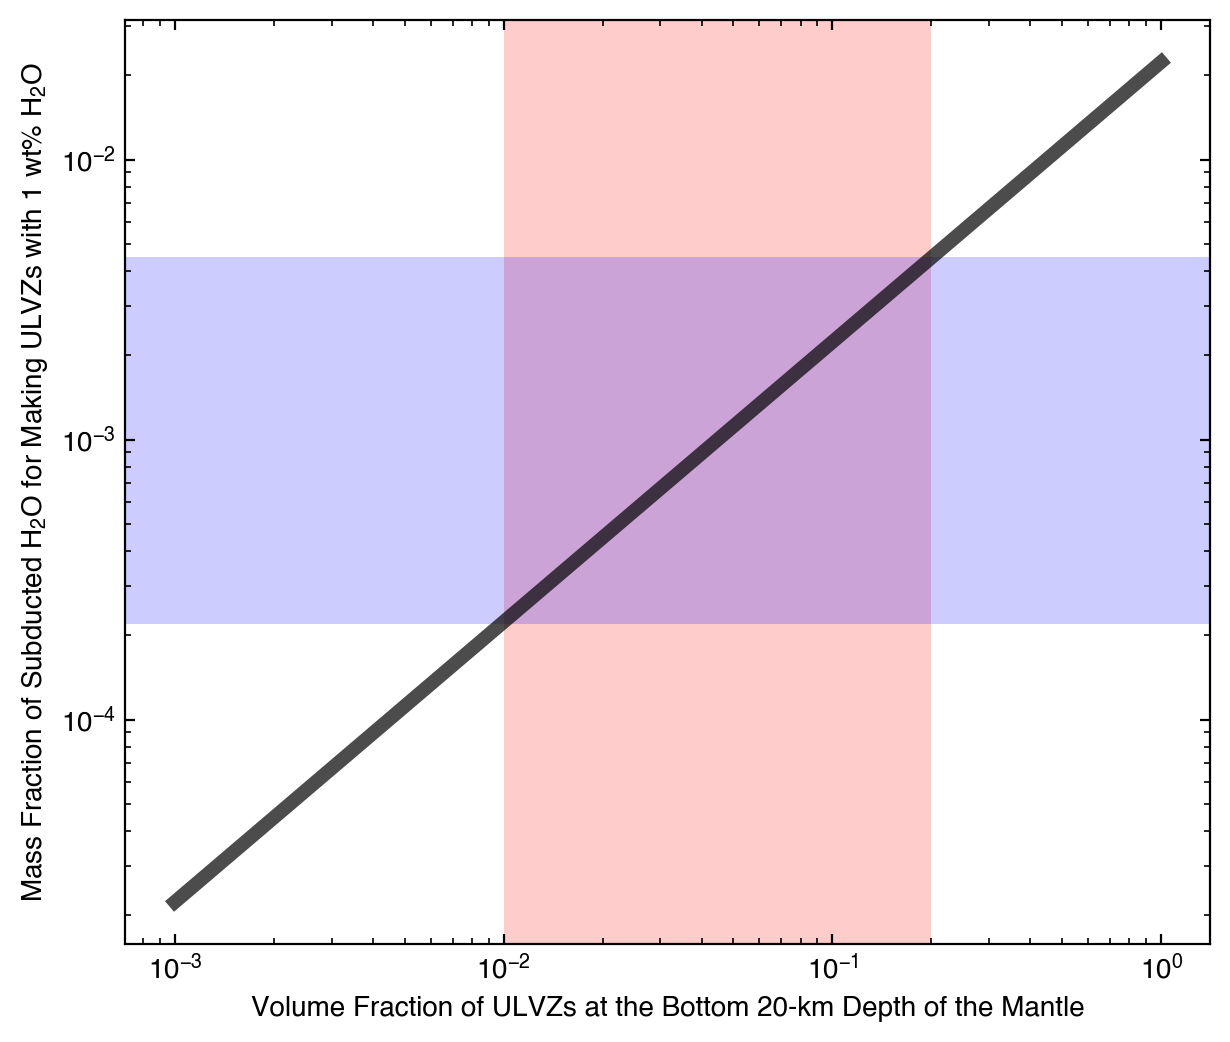

In [15]:
f, ax = plt.subplots(figsize=(7,6))

ax.plot((f_v_ulvz), f_surface_water_in_ulvz, 'k-', lw=5, alpha=0.7, zorder=99)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Volume Fraction of ULVZs at the Bottom 20-km Depth of the Mantle')
ax.set_ylabel('Mass Fraction of Subducted H$_\mathdefault{2}$O for Making ULVZs with 1 wt% H$_\mathdefault{2}$O')
ax.axvspan(0.01, 0.2, alpha=0.2, color='red', linewidth=0)
ax.axhspan(0.00022, 0.0045, alpha=0.2, color='blue', linewidth=0)

In [16]:
f_v_ulvz, f_surface_water_in_ulvz * 100.

(array([0.001     , 0.00125893, 0.00158489, 0.00199526, 0.00251189,
        0.00316228, 0.00398107, 0.00501187, 0.00630957, 0.00794328,
        0.01      , 0.01258925, 0.01584893, 0.01995262, 0.02511886,
        0.03162278, 0.03981072, 0.05011872, 0.06309573, 0.07943282,
        0.1       , 0.12589254, 0.15848932, 0.19952623, 0.25118864,
        0.31622777, 0.39810717, 0.50118723, 0.63095734, 0.79432823,
        1.        ]),
 array([0.00223212, 0.00281007, 0.00353767, 0.00445366, 0.00560682,
        0.00705857, 0.00888622, 0.01118709, 0.01408371, 0.01773034,
        0.02232117, 0.02810069, 0.03537667, 0.04453659, 0.05606825,
        0.07058574, 0.08886218, 0.11187086, 0.14083707, 0.17730336,
        0.22321171, 0.28100689, 0.35376671, 0.44536591, 0.56068246,
        0.70585739, 0.88862181, 1.11870857, 1.40837065, 1.7730336 ,
        2.23211706]))

If 1-20% of the lowermost mantle contains ULVZs and these ULVZs are formed by hydrous melting (with 1 wt% H2O in the melt and 0.22 melt volume fraction in ULVZ), the process needs only 0.022-0.45% of the subducted water at the surface at the CMB.  